# K-means

In [7]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Making the data

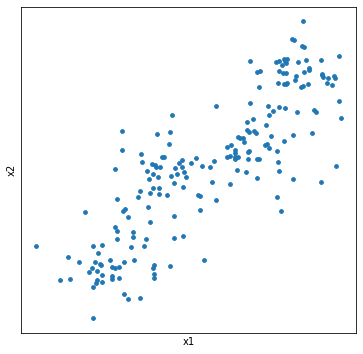

x1 min:2.64, x1 max:45.64
x2 min:-1.2, x2 max:54.45


In [8]:
data=pd.DataFrame(columns=['x1','x2'], index=range(201))
std=4
for i in range(201):
    if i < 50:
        x1=random.gauss(14, std)
        x2=random.gauss(10, std)
        data.iloc[i,0]=x1
        data.iloc[i,1]=x2
    elif i >= 50 and i < 100:
        x1=random.gauss(20, std)
        x2=random.gauss(24, std)
        data.iloc[i,0]=x1
        data.iloc[i,1]=x2
    elif i >= 100 and i < 150:
        x1=random.gauss(34, std)
        x2=random.gauss(30, std)
        data.iloc[i,0]=x1
        data.iloc[i,1]=x2
    else:
        x1=random.gauss(40, std)
        x2=random.gauss(44, std)
        data.iloc[i,0]=x1
        data.iloc[i,1]=x2 
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data.x1,data.x2,s=14)
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()
print('x1 min:%s, x1 max:%s'%(round(data.x1.min(),2),round(data.x1.max(),2)))
print('x2 min:%s, x2 max:%s'%(round(data.x2.min(),2),round(data.x2.max(),2)))

### random centroids to start

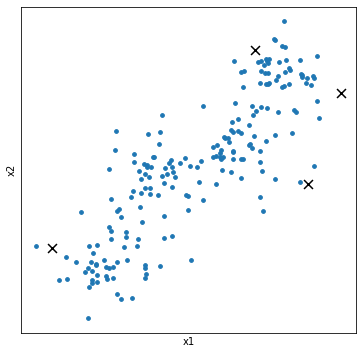

In [9]:
k=pd.DataFrame(columns=['x1','x2'], index=range(4))
for i in range(4):
    k.iloc[i,0]=random.randrange(4,50)
    k.iloc[i,1]=random.randrange(4,60)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data.x1,data.x2,s=14)
ax.scatter(k.x1,k.x2,s=80,color='black',marker='x')
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()

### Euclidean Distance
$d(q,p)=\sqrt{\sum_{i=1}^{n}(q_{i}-p_{i})^{2}}$

### Using Euclidean Distance to assign a data point to one of the four closest centroids

In [10]:
data['centroid']=0
for idx,values in data.iterrows():
    distance=[]
    for c in range(4):
        value=np.array(values[:2])
        centroid=np.array(k.iloc[c,:])
        distance.append(np.sqrt(np.sum(centroid-value)**2))
    data.iloc[idx,2]=int(distance.index(min(distance)))
print('centroid count:')
data.centroid.value_counts()

centroid count:


2    92
3    62
0    35
1    12
Name: centroid, dtype: int64

### Updating centroids

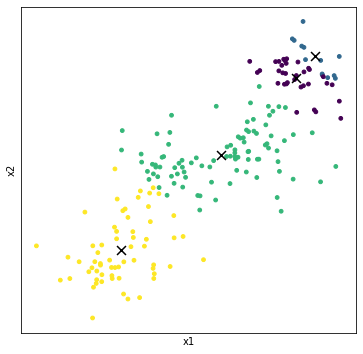

In [11]:
for i in range(4):
    cluster=data[data.centroid==i]
    x1_avg=sum(cluster.x1)/len(cluster)
    x2_avg=sum(cluster.x2)/len(cluster)
    k.iloc[i,0]=x1_avg
    k.iloc[i,1]=x2_avg
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data.x1,data.x2,s=14,c=data.centroid)
ax.scatter(k.x1,k.x2,s=80,color='black',marker='x')
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()   

### Repeat until there is no more movement of centroids

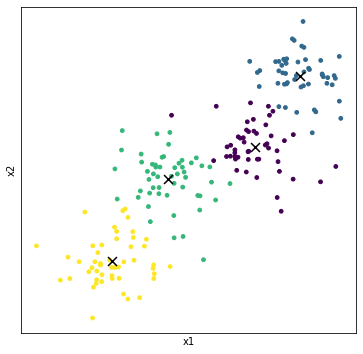

In [12]:
for epoch in range(10):
    for idx,values in data.iterrows():
        distance=[]
        for c in range(4):
            value=np.array(values[:2])
            centroid=np.array(k.iloc[c,:])
            distance.append(np.sqrt(np.sum(centroid-value)**2))
        data.iloc[idx,2]=int(distance.index(min(distance)))
    for i in range(4):
        cluster=data[data.centroid==i]
        x1_avg=sum(cluster.x1)/len(cluster)
        x2_avg=sum(cluster.x2)/len(cluster)
        k.iloc[i,0]=x1_avg
        k.iloc[i,1]=x2_avg
#     print(data.centroid.value_counts())
#     print(k)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data.x1,data.x2,s=14,c=data.centroid)
ax.scatter(k.x1,k.x2,s=80,color='black',marker='x')
plt.xticks([])
plt.yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.show()   